In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/initial_100_inf_interventions_and_internal_epidemic_dynamics_of_Wuhanshi_420100_and_Beijing_100_percentage.csv',
  header=[0, 1])
df.rename(columns={'Beijingshi_110000': 'Beijingshi_110000_100', 'Wuhanshi_420100': 'Wuhanshi_420100_100'}, inplace=True)
df.index.name = 'Time_days'
df = df.loc[:,df.columns.get_level_values(1).isin(["I_ii", "I_ij"])]

I = np.array(df.loc[:, 'Beijingshi_110000_100']['I_ii'])+np.array(df.loc[:, 'Beijingshi_110000_100']['I_ij'])
# Get the maximum element from a Numpy array
print(np.amax(I))
# Get the indices of maximum element in numpy array
print(np.where(I == np.amax(I)))

5332676.017858155
(array([185]),)


In [ ]:
df

/var/folders/tt/5m471nxs2815sn_md1rbdvxdb8phhw/T/ipykernel_5309/1013592696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Beijing['I'] = df_Beijing['I_ii']+df_Beijing['I_ij']


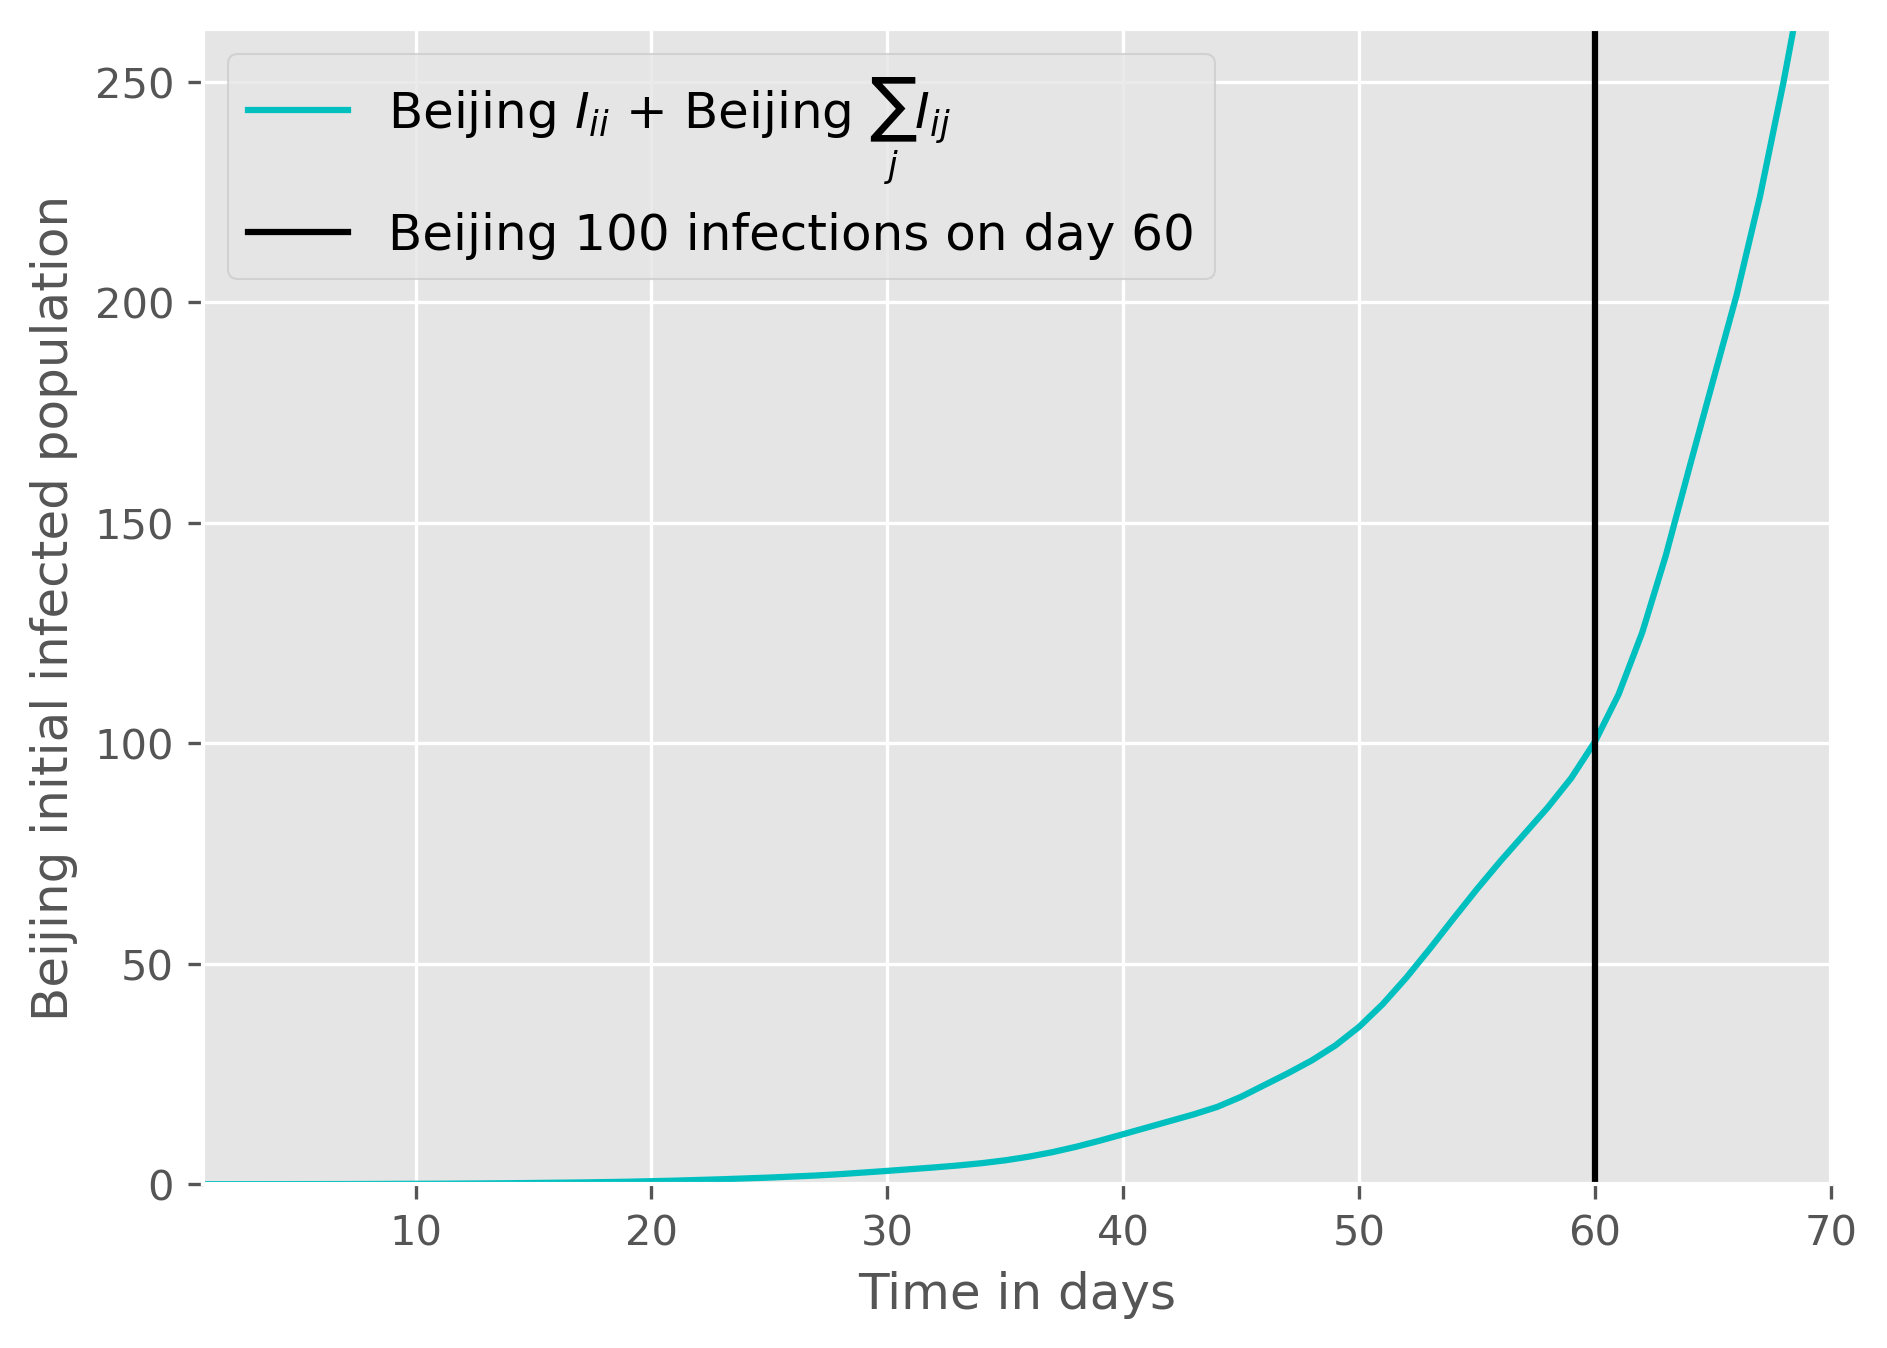

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 5] #[W,H]
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot') 

df_Beijing = df['Beijingshi_110000_100']
df_Beijing['I'] = df_Beijing['I_ii']+df_Beijing['I_ij']
df_Beijing['Day'] = df_Beijing.index+1
df_Beijing = df_Beijing[['Day', 'I']]
t = np.array(df_Beijing['Day'])

df_time_100 = df_Beijing.loc[(df_Beijing['I'] >= 100) & (df_Beijing['I']<101)]
time_100 = int(df_time_100['Day'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(t, np.array(df_Beijing['I']), '-c', label=r'Beijing $I_{ii}$ + Beijing $\sum_{j}I_{ij}$')
plt.axvline(x=time_100, label= f'Beijing 100 infections on day {time_100}', c='k')


#plt.axvline(x=time_list[0], label= f'Beijing 100 infections on {time_list[0]}', c='k')
#ax.set_yscale('log')
plt.ylim([0, 262])
plt.xlim([1, 70])
#ax.set_title(r"Beijing Initial Epidemic size")
ax.legend(loc='best', fontsize=12)
plt.xlabel('Time in days')
plt.ylabel('Beijing initial infected population')

plt.subplots_adjust(wspace=0.3) # the amount of width reserved for blank space between subplots
plt.subplots_adjust(hspace=0.3) # the amount of height reserved for white space between subplots

plt.savefig('Beijing_inital_Epidemic_size.pdf', 
             metadata = {'Creator': 'Reju Sam John', 'Author': 'Reju', 'Title': 'internal epidemic dynamics Beijing'},
            bbox_inches = 'tight', pad_inches = 0.2)
plt.show()

/var/folders/tt/5m471nxs2815sn_md1rbdvxdb8phhw/T/ipykernel_6630/1857593997.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Beijing['S'] = df_Beijing['S_ii']+df_Beijing['S_ij']
/var/folders/tt/5m471nxs2815sn_md1rbdvxdb8phhw/T/ipykernel_6630/1857593997.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Beijing['I'] = df_Beijing['I_ii']+df_Beijing['I_ij']
/var/folders/tt/5m471nxs2815sn_md1rbdvxdb8phhw/T/ipykernel_6630/1857593997.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy

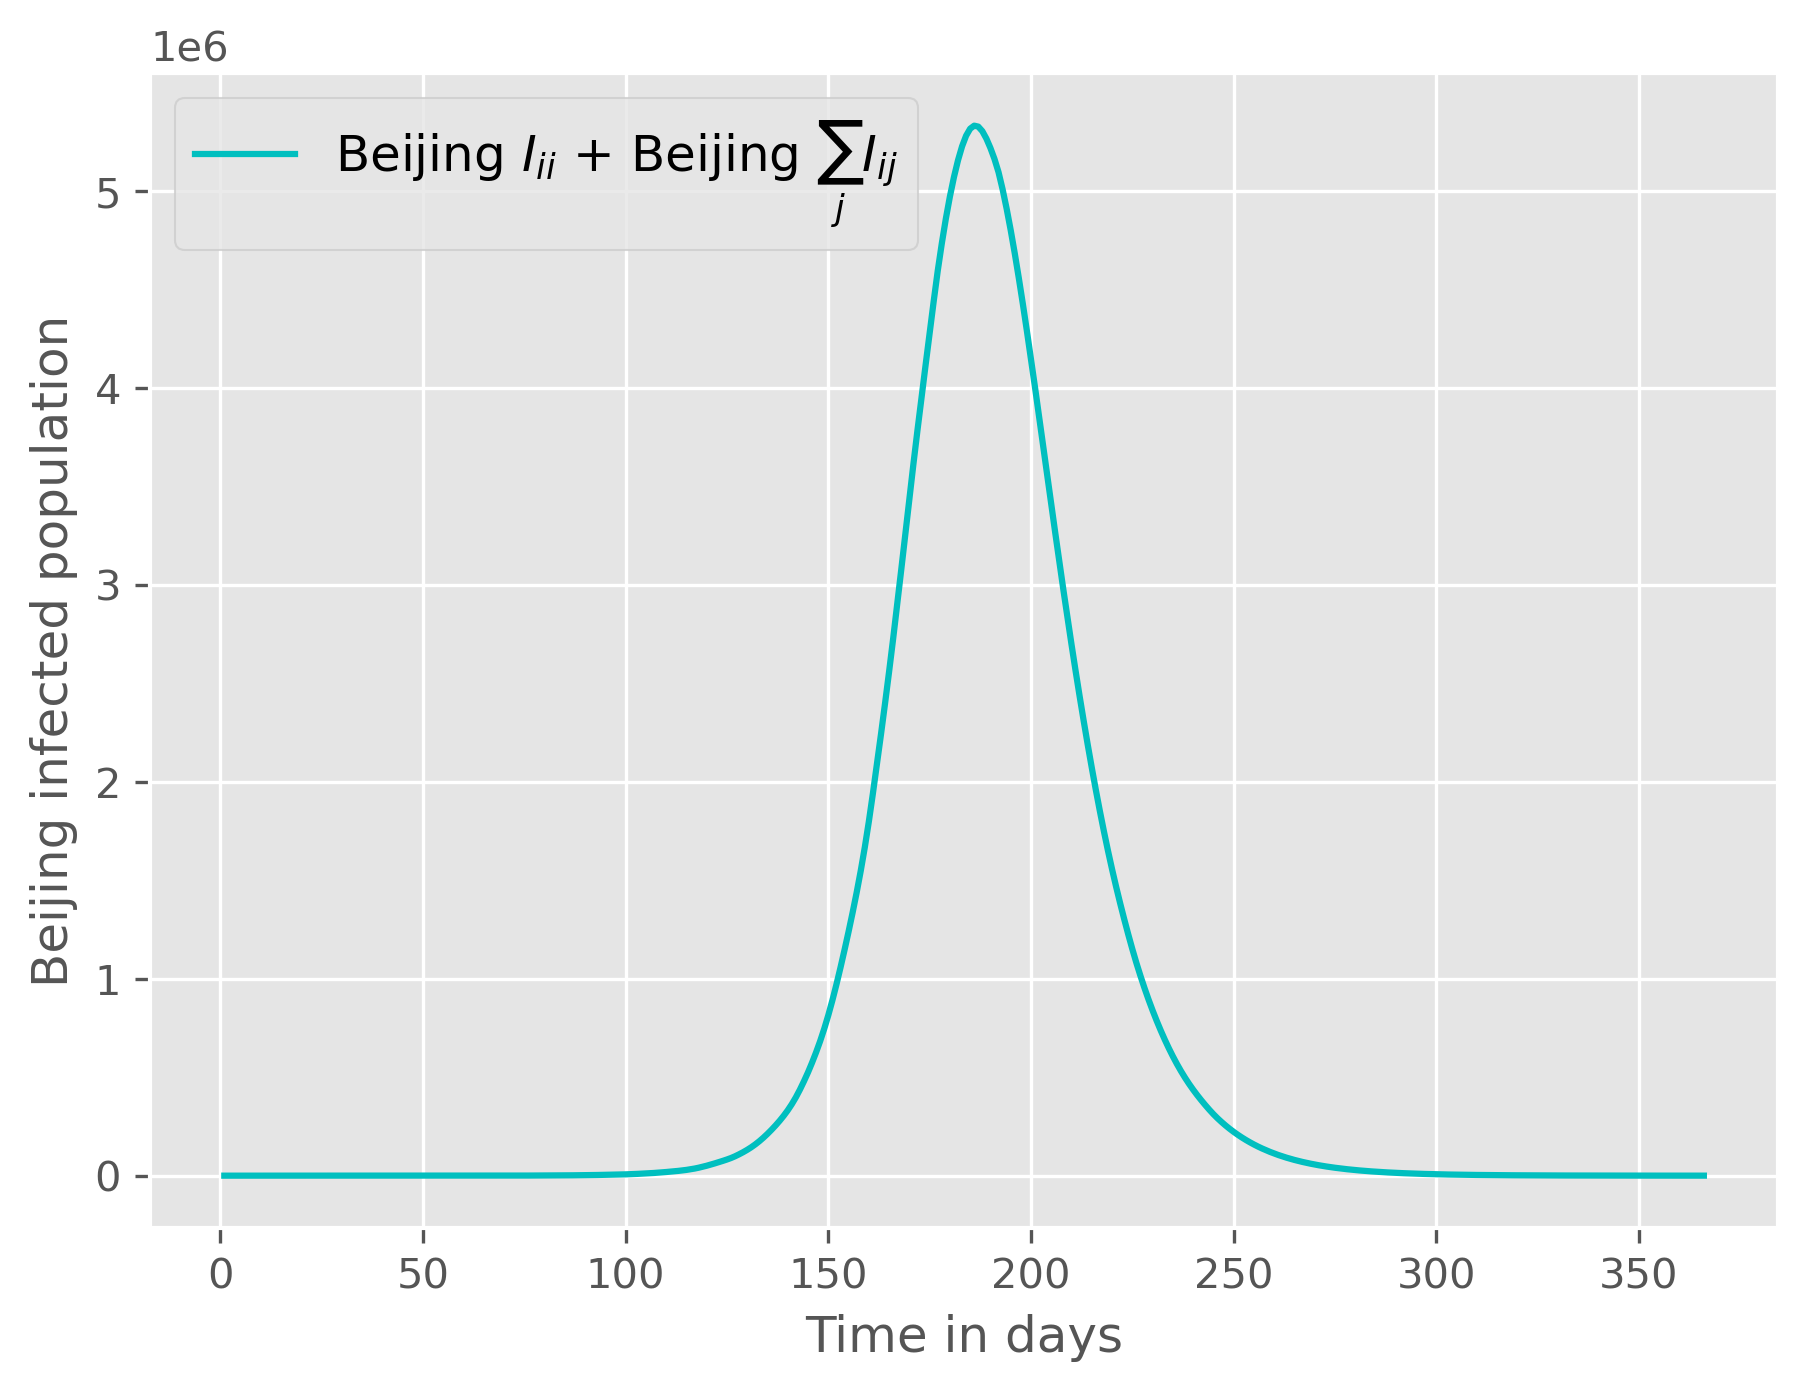

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 5] #[W,H]
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot') 

import pandas as pd
import numpy as np
df = pd.read_csv('./data/initial_100_inf_interventions_and_internal_epidemic_dynamics_of_Wuhanshi_420100_and_Beijing_100_percentage.csv',
  header=[0, 1])
df.rename(columns={'Beijingshi_110000': 'Beijingshi_110000_100', 'Wuhanshi_420100': 'Wuhanshi_420100_100'}, inplace=True)
df.index.name = 'Time_days'
df = df.loc[:,df.columns.get_level_values(1).isin(["S_ii", "S_ij", "I_ii", "I_ij"])]

df_Beijing = df['Beijingshi_110000_100']
df_Beijing['S'] = df_Beijing['S_ii']+df_Beijing['S_ij']
df_Beijing['I'] = df_Beijing['I_ii']+df_Beijing['I_ij']

df_Beijing['Day'] = df_Beijing.index+1
df_Beijing = df_Beijing[['Day', 'S', 'I']]
t = np.array(df_Beijing['Day'])


# Plot S and I columns against Day column
#plt.plot(df_Beijing['Day'], df_Beijing['S'], label='Susceptible')
plt.plot(df_Beijing['Day'], df_Beijing['I'], '-c', label=r'Beijing $I_{ii}$ + Beijing $\sum_{j}I_{ij}$')

# Set axis labels and title
plt.xlabel('Time in days')
plt.ylabel('Beijing infected population')

plt.legend(loc='best', fontsize=12)

plt.savefig('Beijing_Epidemic_size.pdf', 
            metadata = {'Creator': 'Reju Sam John', 'Author': 'Reju', 'Title': 'Epidemic dynamics Beijing'},
           bbox_inches = 'tight', pad_inches = 0.2)

# Show the plot
plt.show()

In [14]:
df_Beijing

,Day,S,I
Time_days,,,
0,1,2.859078e+07,0.000000
1,2,2.859079e+07,0.000188
2,3,2.859081e+07,0.001323
3,4,2.859085e+07,0.004006
4,5,2.859089e+07,0.008674
...,...,...,...
361,362,1.909959e+06,105.887430
362,363,1.911280e+06,98.964879
363,364,1.912602e+06,92.496546


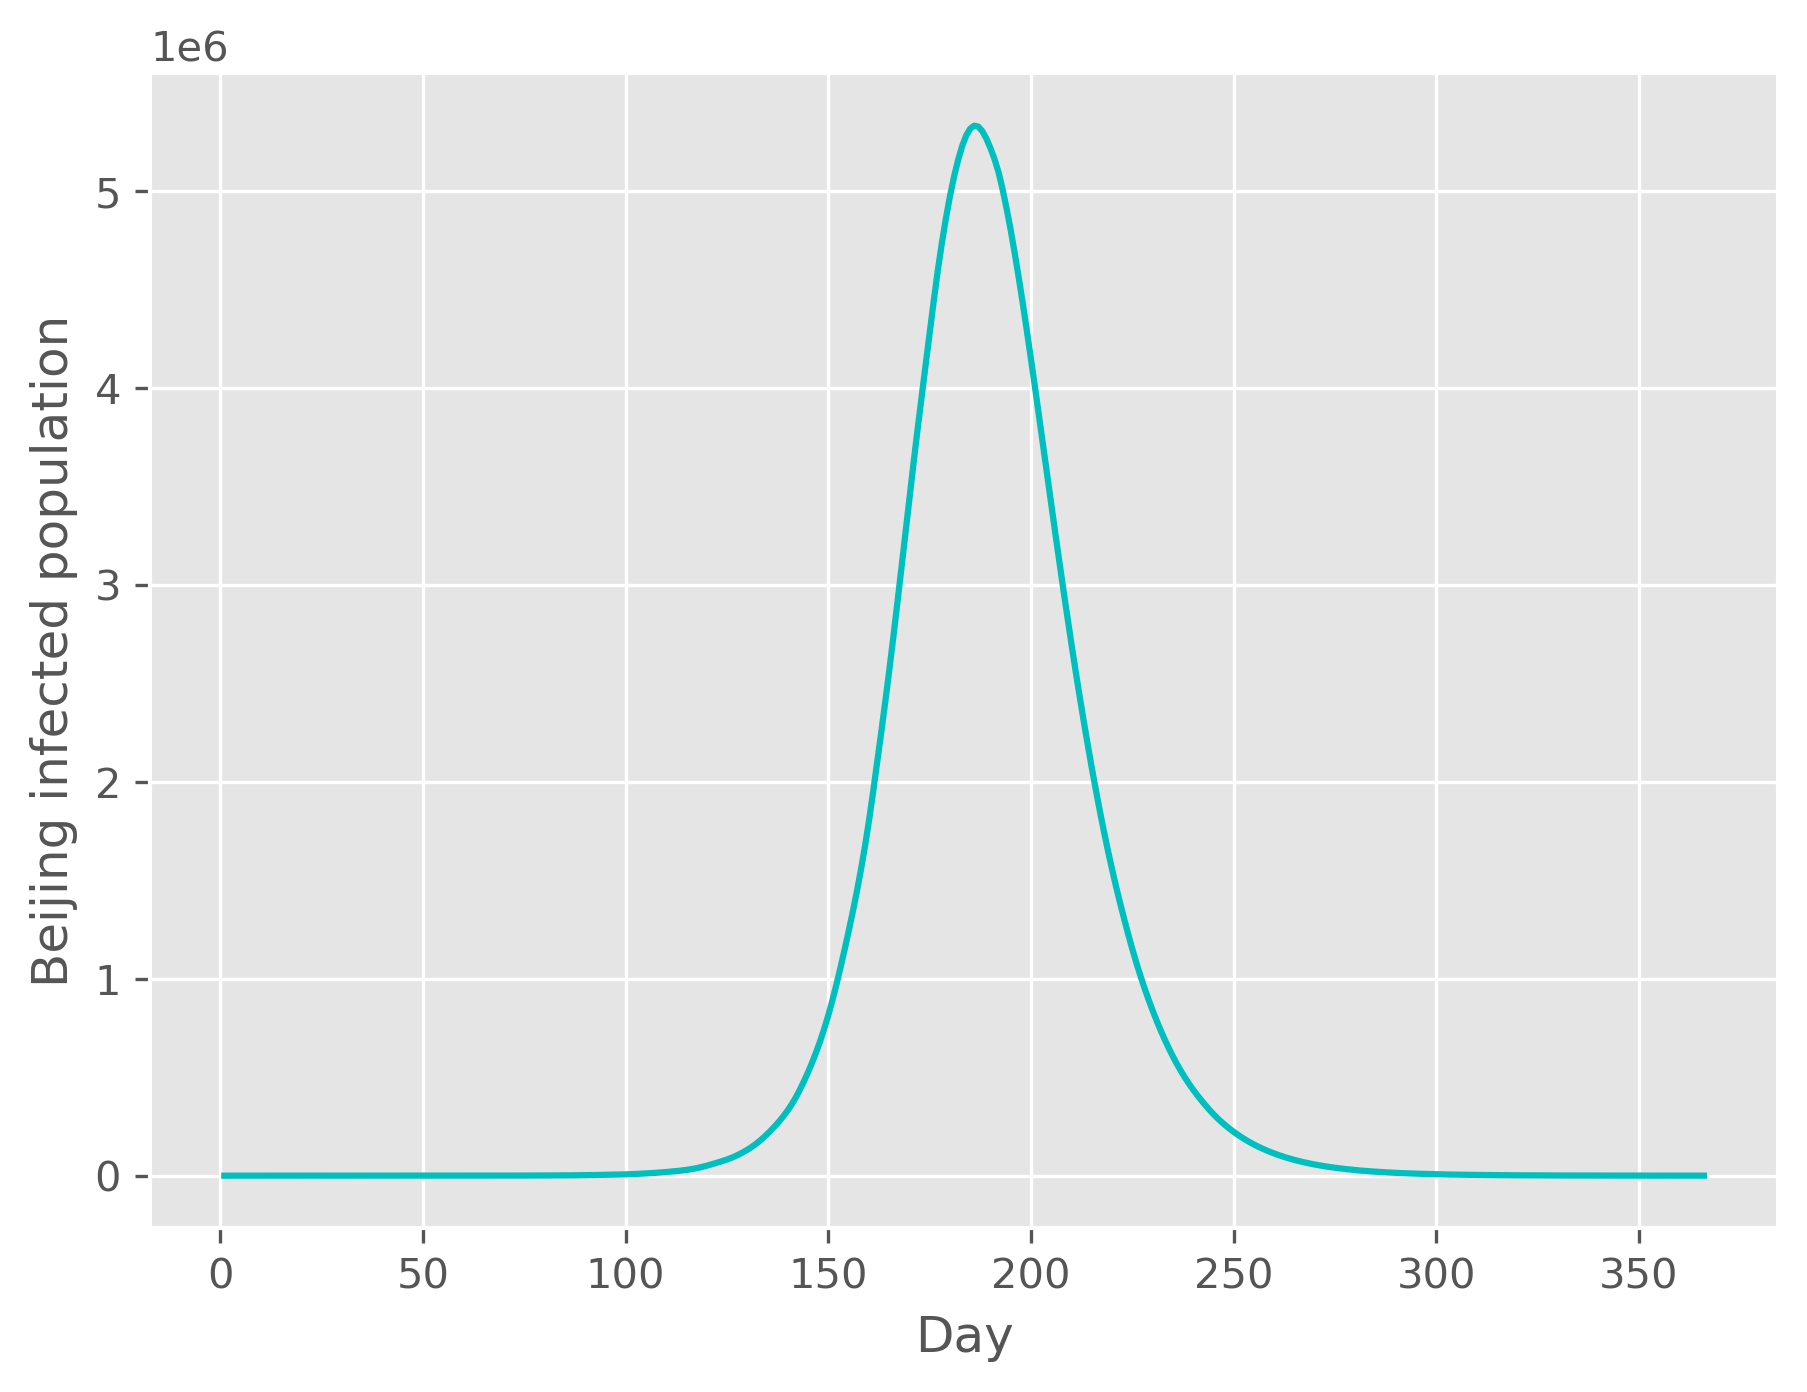